<a href="https://colab.research.google.com/github/achintya09/CODSOFT/blob/main/IRIS_flower_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IRIS FLOWER CLASSIFICATION PROJECT

## PROJECT INTRODUCTION
The Iris flower data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. The data set consists of 50 samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

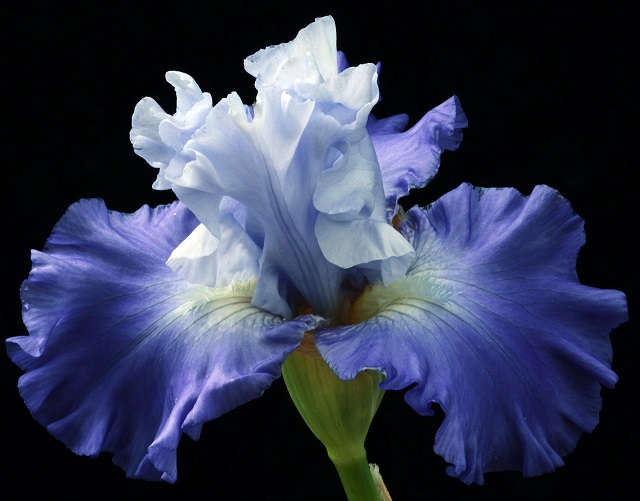

## PROBLEM STATEMENT
* To develop a model that can classify iris
flowers into different species based on their sepal and petal
measurements.
* To develop a user friendly interface for giving instant result for different inputs.

## ADDRESSING THE PROBLEM
* I checked accuracy score of various classification model and found decision tree and random forest performing best among all.
* Here I intend to use Logistic Decision Tree to prepare the model.
* I will use for loop to create the user friendly interface.

## GETTING STARTED!

### IMPORTING LIBRARIES

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### IMPORTING DATA SET

In [53]:
dataset = pd.read_csv('IRIS.csv')

### HANDLING MISSING AND DUPLICATE DATA

In [54]:
dataset.shape

(150, 5)

In [55]:
dataset.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [56]:
dataset.duplicated().sum()

3

In [57]:
dataset = dataset.drop_duplicates()

In [58]:
dataset.shape

(147, 5)

In [59]:
dataset.head()

sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

### SPLITTING THE DATASET INTO FEATURES AND TARGET COLUMN

In [60]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

### SPLITTING INTO TRAIN AND TEST SET

In [61]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train , y_test = train_test_split(x, y, test_size= 0.25, random_state= 0)

### FEATURES SCALING

In [62]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [63]:
print(x_train)

[[-6.10098483e-01  1.53813414e+00 -1.38016764e+00 -1.41188439e+00]
 [ 2.42489234e-01 -9.90591826e-01  9.89286509e-01  1.97517505e-01]
 [ 1.58226993e+00  1.30824996e+00  1.27824433e+00  1.67280258e+00]
 [-1.10725677e-03 -7.10551099e-02  1.80204606e-01  3.31634330e-01]
 [ 1.09507695e+00 -7.10551099e-02  9.31494945e-01  1.13633528e+00]
 [ 2.42489234e-01 -3.00939289e-01  4.69162428e-01  1.97517505e-01]
 [ 8.51480459e-01 -7.10551099e-02  2.95787735e-01  1.97517505e-01]
 [ 1.58226993e+00  3.88713248e-01  1.22045277e+00  7.33984804e-01]
 [ 9.73278704e-01  1.58829069e-01  9.89286509e-01  1.53868575e+00]
 [ 7.29682214e-01 -7.10551099e-02  9.31494945e-01  7.33984804e-01]
 [-2.44703747e-01 -5.30823468e-01  1.22413041e-01  6.34006807e-02]
 [-2.44703747e-01 -3.00939289e-01  1.80204606e-01  6.34006807e-02]
 [ 1.20690988e-01 -1.91012854e+00  6.46214767e-02 -3.38949793e-01]
 [-1.34088795e+00  1.58829069e-01 -1.32237607e+00 -1.41188439e+00]
 [ 8.51480459e-01 -3.00939289e-01  4.11370864e-01  6.34006807e

In [64]:
print(x_test)

[[-0.875107    0.63056666 -1.10026449 -1.14269565]
 [-1.11674102  0.63056666 -0.87565878 -1.14269565]
 [-0.63347298  0.86387633 -1.10026449 -1.14269565]
 [ 2.3869523  -0.76929133  1.81960983  1.19895144]
 [ 0.69551414 -1.46922032  0.86503553  1.06885993]
 [-0.27102194 -1.93583965  0.30352124  0.2883109 ]
 [-1.11674102 -0.302672   -1.15641592 -1.01260415]
 [-1.35837504  1.09718599 -1.38102164 -1.14269565]
 [ 0.09142909 -0.76929133  0.92118696  1.71931746]
 [-0.875107    0.63056666 -1.04411306 -0.88251264]
 [-1.60000906  0.16394733 -1.21256735 -1.14269565]
 [-0.27102194 -1.70252999  0.19121838  0.02812789]
 [ 0.69551414 -0.76929133  0.92118696  0.54849391]
 [-0.15020493 -0.53598166  0.07891552  0.2883109 ]
 [ 0.45388012 -0.76929133  0.69658124  0.1582194 ]
 [-0.875107   -1.93583965 -0.08953877 -0.10196361]
 [-0.39183895  1.79711498 -1.21256735 -0.88251264]
 [ 0.69551414  0.397257    0.69658124  0.67858542]
 [ 0.69551414  0.397257    1.42654983  1.84940896]
 [-1.60000906 -0.53598166 -1.15

### TRAINING THE MODEL

In [65]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

### COMPARING RESULT OF PREDICTED CLASS AND ORIGINAL CLASS

In [66]:
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[['Iris-setosa' 'Iris-setosa']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-virginica' 'Iris-versicolor']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-versicolor']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-setosa' 'Iris-setosa']
 ['Iris-virginica' 'Iris-virginica']
 ['Iris-versicolor' 'Iris-versicolor']
 ['Iris-virgin

### CHECKING ACCURACY AND MODEL PERFORMANCE

In [67]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[15  0  0]
 [ 0 10  3]
 [ 0  0  9]]


0.918918918918919

### CREATING USER FRIENDLY INTERFACE

In [68]:
user_input = []
message = [
    "Enter Sepal Length: ",
    "Enter Sepal Width: ",
    "Enter Petal Length: ",
    "Enter Petal Width: "
]

for m in message:
  value= input(m)
  user_input.append(value)

result = classifier.predict(sc.transform([user_input]))
print(" ")
print("THE SPECIES OF THE FLOWER IS   ", result[0])

Enter Sepal Length: 5
Enter Sepal Width: 4
Enter Petal Length: 1.8
Enter Petal Width: 0.4
 
THE SPECIES OF THE FLOWER IS    Iris-setosa
